In [1]:
import os
os.chdir("../../../")

In [2]:
import torch
from torchts.nn.models.ode import ODESolver

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [10]:
# Rossler Attractor equations
def x_prime(prev_val, coeffs):
    return -prev_val["y"]-prev_val["z"]

def y_prime(prev_val, coeffs):
    return prev_val["x"]+coeffs["alpha"]*prev_val["y"]

def z_prime(prev_val, coeffs):
    return coeffs["beta"] + prev_val["x"]*prev_val["z"]-coeffs["gamma"]*prev_val["z"]

ode = {"x": x_prime, "y": y_prime, "z": z_prime}

# Initial conditions [0,0,0]
ode_init = {"x":0, "y":0, "z":0}

# Constants (Parameters)
ode_coeffs = {"alpha": 0.2, "beta": 0.2, "gamma": 5.7}


# Euler's Method

In [15]:
ode_solver = ODESolver(
    ode=ode,
    init_vars=ode_init,
    init_coeffs=ode_coeffs,
    dt=0.01,
    solver="euler",
    optimizer=torch.optim.SGD,
    optimizer_args={"lr": 0.01}
)

result = ode_solver(10000)

In [16]:
result

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  2.0000e-03],
        [-2.0000e-05,  0.0000e+00,  3.8860e-03],
        ...,
        [-5.3682e+00, -7.8848e+00,  1.7140e-02],
        [-5.2895e+00, -7.9542e+00,  1.7243e-02],
        [-5.2102e+00, -8.0230e+00,  1.7348e-02]], grad_fn=<StackBackward>)

<ipython-input-17-97482dcfaca7>:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


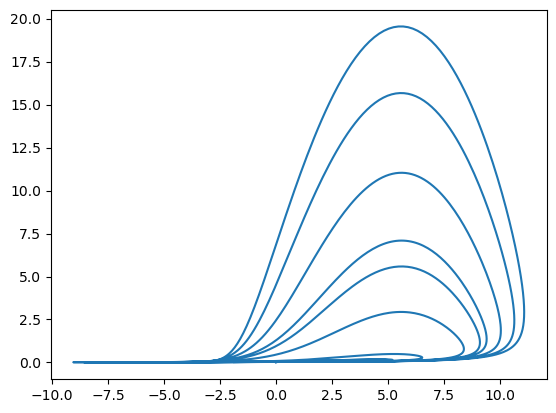

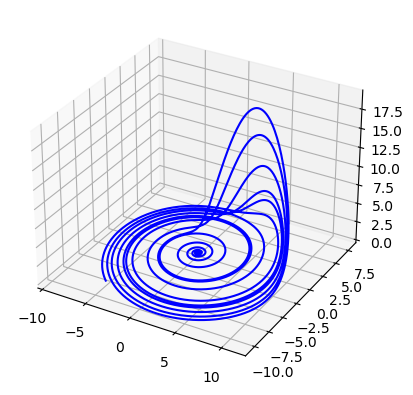

In [17]:
result_np = result.detach().numpy() # Convert to numpy array

# 2D plot of X and Z
plt.plot(result_np[:,0], result_np[:,2])

# 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot3D(result_np[:,0], result_np[:,1], result_np[:,2], 'blue')

plt.show()

# 4th Order Runge-Kutta

In [21]:
ode_solver = ODESolver(
    ode=ode,
    init_vars=ode_init,
    init_coeffs=ode_coeffs,
    dt=0.01,
    solver="rk4",
    optimizer=torch.optim.SGD,
    optimizer_args={"lr": 0.01}
)

result = ode_solver(20000)

In [22]:
result

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-9.8126e-06, -3.2875e-08,  1.9441e-03],
        [-3.8521e-05, -2.5948e-07,  3.7804e-03],
        ...,
        [ 5.7814e-01, -6.2418e+00,  3.3245e-02],
        [ 6.4026e-01, -6.2482e+00,  3.3545e-02],
        [ 7.0243e-01, -6.2539e+00,  3.3850e-02]], grad_fn=<StackBackward>)

<ipython-input-23-97482dcfaca7>:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


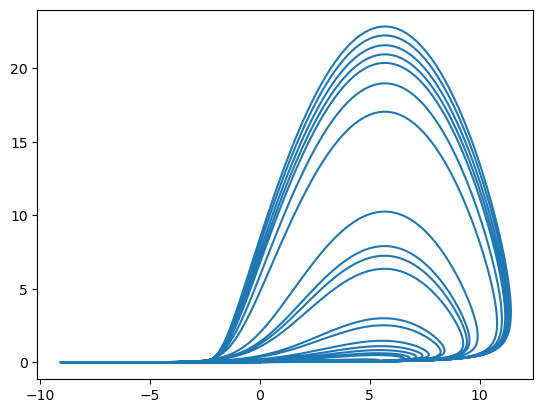

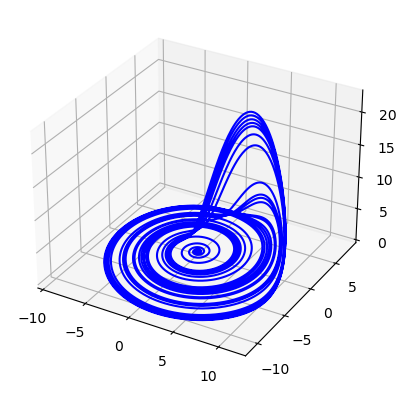

In [23]:
result_np = result.detach().numpy() # Convert to numpy array

# 2D plot of X and Z
plt.plot(result_np[:,0], result_np[:,2])

# 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot3D(result_np[:,0], result_np[:,1], result_np[:,2], 'blue')

plt.show()